###### Try Tensorflow/Keras continuous methods

## Run time: about 6 minutes

In [1]:
# Import required libraries 
# for loading CSV to pandas and numpy data types

import pandas as pd 
import numpy as np 
import pandas

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Load the predictor and target data to a pandas dataframe


In [2]:
# read target df from local 
target_df = pd.read_csv("dataframes/target_df.csv.gz", compression="infer", parse_dates = ["opday"])

# read target_df directly from github
#target_df = pd.read_csv("https://github.com/k5dru/CPSC_5383/blob/main/dataframes/target_df.csv.gz?raw=true", compression="gzip", parse_dates = ["opday"])

### View the source data

Always view the source data.  Pandas makes this trivial.

In [3]:
target_df.head()

,opday,sum_spp_load,is_Friday,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,is_Wednesday,holiday_Christmas Day,...,HDD_TX_FT_WORTH_ALLIANCE_AP,HDD_TX_LUBBOCK,HDD_TX_MIDLAND_ODESSA,HDD_TX_SAN_ANGELO,HDD_TX_WACO_RGNL_AP,HDD_TX_WICHITA_FALLS_MUNI_AP,HDD_WY_CHEYENNE,HDD_WY_TORRINGTON_MUNI_AP,SUM_HDD,SUM_CDD
0,2015-10-03,566229.834662,0,0,1,0,0,0,0,0,...,1.05,5.28,0.00,0.0,0.0,3.30,18.24,16.98,73.32,4.38
1,2015-10-04,552166.723416,0,0,0,1,0,0,0,0,...,0.00,8.34,0.00,0.0,0.0,1.14,18.96,15.00,66.66,2.94
2,2015-10-05,596751.461994,0,1,0,0,0,0,0,0,...,0.00,7.44,1.14,0.0,0.0,1.14,12.30,7.08,61.62,4.02
3,2015-10-06,622735.355003,0,0,0,0,0,1,0,0,...,0.00,3.48,0.00,0.0,0.0,0.60,12.12,8.97,28.14,1.32
4,2015-10-07,645464.796588,0,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.0,0.0,0.00,7.44,0.51,18.90,5.58


In [4]:
target_df.describe()

,sum_spp_load,is_Friday,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,is_Wednesday,holiday_Christmas Day,holiday_Christmas Eve,...,HDD_TX_FT_WORTH_ALLIANCE_AP,HDD_TX_LUBBOCK,HDD_TX_MIDLAND_ODESSA,HDD_TX_SAN_ANGELO,HDD_TX_WACO_RGNL_AP,HDD_TX_WICHITA_FALLS_MUNI_AP,HDD_WY_CHEYENNE,HDD_WY_TORRINGTON_MUNI_AP,SUM_HDD,SUM_CDD
count,1.535000e+03,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,...,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000
mean,7.178639e+05,0.142671,0.143974,0.142671,0.143322,0.141368,0.142671,0.143322,0.003909,0.003257,...,6.173375,8.910704,6.428717,5.824339,5.486463,7.879974,19.121863,18.240430,95.326866,33.324547
std,1.007130e+05,0.349851,0.351178,0.349851,0.350516,0.348514,0.349851,0.350516,0.062418,0.056999,...,9.136330,11.073380,9.305757,8.850519,8.568441,10.596462,15.683710,16.434591,99.562253,29.215506
min,5.400074e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.367939e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.480000,0.000000,1.320000,11.370000
50%,6.941424e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.760000,0.000000,0.000000,0.000000,0.960000,18.600000,16.890000,63.780000,23.640000
75%,7.862803e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.995000,16.620000,11.760000,10.500000,9.420000,14.190000,30.660000,29.850000,167.370000,46.920000
max,1.016596e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,44.970000,52.980000,46.860000,45.420000,44.520000,48.660000,69.540000,76.380000,445.200000,133.200000


In [5]:
target_df.columns


Index(['opday', 'sum_spp_load', 'is_Friday', 'is_Monday', 'is_Saturday',
       'is_Sunday', 'is_Thursday', 'is_Tuesday', 'is_Wednesday',
       'holiday_Christmas Day',
       ...
       'HDD_TX_FT_WORTH_ALLIANCE_AP', 'HDD_TX_LUBBOCK',
       'HDD_TX_MIDLAND_ODESSA', 'HDD_TX_SAN_ANGELO', 'HDD_TX_WACO_RGNL_AP',
       'HDD_TX_WICHITA_FALLS_MUNI_AP', 'HDD_WY_CHEYENNE',
       'HDD_WY_TORRINGTON_MUNI_AP', 'SUM_HDD', 'SUM_CDD'],
      dtype='object', length=485)

## Selection of the predictor measures

and convert the predictors and target to a numpy matrix and vector respectively



In [6]:
# best parameters from genetic search, copied from 05_algorithms:

predictors_df = target_df[[

 # weekdays
    'is_Saturday', 'is_Sunday',
   # 'is_Thursday',
   # 'is_Friday', 'is_Monday', 'is_Tuesday', 'is_Wednesday',
  # various holidays
   # 'holiday_Christmas Day', 'holiday_Christmas Eve',
   # 'holiday_Day After Thanksgiving', 'holiday_Independence Day',
   # 'holiday_Labor Day', 'holiday_Memorial Day',
    'holiday_New Year\'s Day',
   # 'holiday_Thanksgiving', 
  # any holiday:
    'is_holiday',   
    
# best weather stations from genetic search:    
    'TAVG_KS_DODGE_CITY',
    'TAVG_LA_SHREVEPORT', 
    'TAVG_MO_SPRINGFIELD',
    'TAVG_NE_LINCOLN_MUNI_AP', 
    'TAVG_OK_LAWTON_MUNI_AP',
    'TAVG_WY_TORRINGTON_MUNI_AP',
    'TAVG_AR_FT_SMITH_RGNL_AP', 
    'TAVG_IA_SIOUX_CITY_GATEWAY_AP',  
    'TAVG_MT_MILES_CITY_F_WILEY_FLD', 
    'TAVG_NM_ROSWELL_IND_AIR_PK',
    'TAVG_OK_OKLAHOMA_CITY_WILL_ROGERS_AP',
    
    'TMIN_KS_DODGE_CITY',
    'TMIN_LA_SHREVEPORT', 
    'TMIN_MO_SPRINGFIELD',
    'TMIN_NE_LINCOLN_MUNI_AP', 
    'TMIN_OK_LAWTON_MUNI_AP',
    'TMIN_WY_TORRINGTON_MUNI_AP',
    'TMIN_AR_FT_SMITH_RGNL_AP', 
    'TMIN_IA_SIOUX_CITY_GATEWAY_AP',
    'TMIN_MT_MILES_CITY_F_WILEY_FLD', 
    'TMIN_NM_ROSWELL_IND_AIR_PK',
    'TMIN_OK_OKLAHOMA_CITY_WILL_ROGERS_AP',
    
    'TMAX_KS_DODGE_CITY',
    'TMAX_LA_SHREVEPORT', 
    'TMAX_MO_SPRINGFIELD',
    'TMAX_NE_LINCOLN_MUNI_AP', 
    'TMAX_OK_LAWTON_MUNI_AP',
    'TMAX_WY_TORRINGTON_MUNI_AP',
    'TMAX_AR_FT_SMITH_RGNL_AP', 
    'TMAX_IA_SIOUX_CITY_GATEWAY_AP',
    'TMAX_MT_MILES_CITY_F_WILEY_FLD', 
    'TMAX_NM_ROSWELL_IND_AIR_PK',
    'TMAX_OK_OKLAHOMA_CITY_WILL_ROGERS_AP',
  
# HDD and CDD on those stations also for linear models
    'HDD_KS_DODGE_CITY',
    'HDD_LA_SHREVEPORT', 
    'HDD_MO_SPRINGFIELD',
    'HDD_NE_LINCOLN_MUNI_AP', 
    'HDD_OK_LAWTON_MUNI_AP',
    'HDD_WY_TORRINGTON_MUNI_AP',
    'HDD_AR_FT_SMITH_RGNL_AP', 
    'HDD_IA_SIOUX_CITY_GATEWAY_AP',
    'HDD_MT_MILES_CITY_F_WILEY_FLD', 
    'HDD_NM_ROSWELL_IND_AIR_PK',
    'HDD_OK_OKLAHOMA_CITY_WILL_ROGERS_AP',
    
    'CDD_KS_DODGE_CITY',
    'CDD_LA_SHREVEPORT', 
    'CDD_MO_SPRINGFIELD',
    'CDD_NE_LINCOLN_MUNI_AP', 
    'CDD_OK_LAWTON_MUNI_AP',
    'CDD_WY_TORRINGTON_MUNI_AP',
    'CDD_AR_FT_SMITH_RGNL_AP', 
    'CDD_IA_SIOUX_CITY_GATEWAY_AP',  
    'CDD_MT_MILES_CITY_F_WILEY_FLD', 
    'CDD_NM_ROSWELL_IND_AIR_PK',
    'CDD_OK_OKLAHOMA_CITY_WILL_ROGERS_AP',

]].copy()


In [7]:
# Or if you want to try everything:
# predictors_df = target_df.drop(['opday', 'sum_spp_load'], axis=1).copy()

## See the note in the Algorithms workbook about "opmonth"

I believe it models electric demand growth over time.  I'm open to suggestions. 
Since I used it there, I need to be consistent and use it here also.


In [8]:
# try "months since 2015"; this should work as well as opday if it is only modeling load growth over time 
predictors_df['opmonth'] = (target_df.opday.dt.year - 2015) * 12 + target_df.opday.dt.month 

## Convert to numpy arrays

In [9]:
predictor_names = predictors_df.columns.to_numpy()
predictors = predictors_df.to_numpy()

# only include status in the target array 
target = target_df['sum_spp_load'].to_numpy()

### Scale the predictors

Note: I am still a bit uncomfortable about destroying the original ranges of the data. We must save these somehow/somewhere in order to be able to use new data with the model.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
scaler = MinMaxScaler((0, 1))
X = scaler.fit_transform(predictors)
#y = scaler.fit_transform(target.reshape(-1, 1))
#y = target
y = scaler.fit_transform(target.reshape(-1, 1)).ravel()


### Split into training and testing sets

both the predictors and the targes, together, into a training set (75%) and a testing set (25%). Use constant random seed for repeatability but test with other random seeds to validate results.

## NOTE!  
Since the demand on adjacent days is similar, and I'm really interested in predicting new data as both "unseen" data and "future" data, I am NOT shuffling my training and test data, but instead training with the first majority of the data and testing with the following (future) days.

In [11]:
# Since this is time-series data and we are ultimately interested in a models ability to predict future results, 
# set the training data to be the first 80% of the values, and let the test day be the last 20% (future) values.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .237, shuffle=False)

print (f"Input split into {len(y_train)} training observations and {len(y_test)} testing observations.")

Input split into 1171 training observations and 364 testing observations.


## Set up a report to compare different configurations at the end

In [12]:
from sklearn import metrics

# use all the continuous regression metrics from 
# https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

report=pd.DataFrame(columns=['Algorithm', 'Explained Variance', 'R2/COD', 'Max Error', 'Mean AE', 
                             'Mean Squared Error', 'MAPE',
                             'Median AE'])

def add_to_report(rep, algorithm, y_test, y_pred):
    explained_variance = metrics.explained_variance_score(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    max_error = metrics.max_error(y_test, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
    mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
#    mean_squared_log_error = metrics.mean_squared_log_error(y_test, y_pred)
#    Mean Squared Logarithmic Error cannot be used when targets contain negative values.
    mean_absolute_percentage_error = metrics.mean_absolute_percentage_error(y_test, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_test, y_pred)
    rep.loc[len(rep.index)] = [algorithm, explained_variance, r2_score, max_error, mean_absolute_error,
                              mean_squared_error, mean_absolute_percentage_error,
                              median_absolute_error]
    return rep

## Set up a standard plot to evaluate models

In [13]:
# scatter plot true vs. predicted values 
import pylab as pl
%matplotlib inline
from pylab import *

def myplot (algorithm, x_axis, y_axis):
    pl.figure(figsize=(8, 6), dpi=120)
    pl.scatter(x_axis, x_axis,  c="y", label='true', s=1)
    pl.scatter(x_axis, y_axis,  c="b", label=algorithm, s=1)
    pl.legend()
    plt.xlabel("True Demand")  # custom x label using matplotlib
    plt.ylabel("Predicted Demand")
    pl.show()

## Keras imports

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adadelta, Adam

seed = 7
np.random.seed(seed)

## Starting with an example from https://www.kaggle.com/diegosiebra/neural-network-model-for-house-prices-keras


In [15]:

# Model from example, with my data of course
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())

model.fit(X_train, y_train, epochs=100, batch_size=10)

model_desc = '1: Keras 200/100/50/25/1 relu example'

y_pred = model.predict(X_test)

Epoch 1/100
118/118 [==============================] - 0s 720us/step - loss: 0.1705
Epoch 2/100
118/118 [==============================] - 0s 694us/step - loss: 0.1700
Epoch 3/100
118/118 [==============================] - 0s 857us/step - loss: 0.1696
Epoch 4/100
118/118 [==============================] - 0s 857us/step - loss: 0.1691
Epoch 5/100
118/118 [==============================] - 0s 724us/step - loss: 0.1686
Epoch 6/100
118/118 [==============================] - 0s 874us/step - loss: 0.1681
Epoch 7/100
118/118 [==============================] - 0s 689us/step - loss: 0.1675
Epoch 8/100
118/118 [==============================] - 0s 724us/step - loss: 0.1669
Epoch 9/100
118/118 [==============================] - 0s 857us/step - loss: 0.1663
Epoch 10/100
118/118 [==============================] - 0s 723us/step - loss: 0.1657
Epoch 11/100
118/118 [==============================] - 0s 801us/step - loss: 0.1650
Epoch 12/100
118/118 [==============================] - 0s 766us/step - lo

118/118 [==============================] - 0s 724us/step - loss: 0.0374
Epoch 98/100
118/118 [==============================] - 0s 590us/step - loss: 0.0370
Epoch 99/100
118/118 [==============================] - 0s 723us/step - loss: 0.0368
Epoch 100/100
118/118 [==============================] - 0s 668us/step - loss: 0.0365


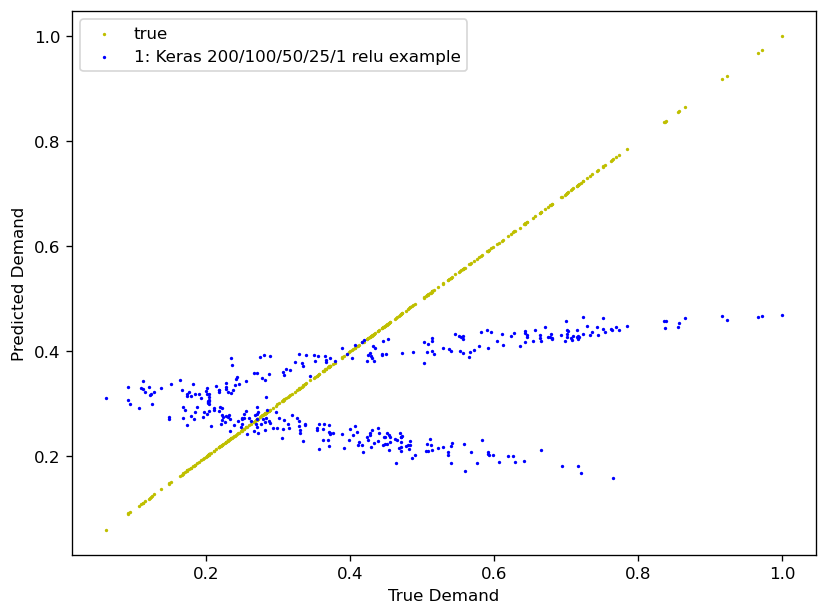

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,1: Keras 200/100/50/25/1 relu example,0.170356,-0.09404,0.606588,0.165858,0.042425,0.431973,0.138826


In [16]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(3)

## Wow that's bad.  
You can see the V shape of the tempature vs. demand curve, but this needs some work

In [17]:
# trying this Keras example: https://www.kaggle.com/diegosiebra/neural-network-model-for-house-prices-keras

model_desc = '2: Keres less verbose'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/100
118/118 [==============================] - 0s 828us/step - loss: 0.0925
Epoch 2/100
118/118 [==============================] - 0s 599us/step - loss: 0.0803
Epoch 3/100
118/118 [==============================] - 0s 857us/step - loss: 0.0696
Epoch 4/100
118/118 [==============================] - 0s 801us/step - loss: 0.0605
Epoch 5/100
118/118 [==============================] - 0s 668us/step - loss: 0.0530
Epoch 6/100
118/118 [==============================] - 0s 724us/step - loss: 0.0467
Epoch 7/100
118/118 [==============================] - 0s 823us/step - loss: 0.0414
Epoch 8/100
118/118 [==============================] - 0s 612us/step - loss: 0.0370
Epoch 9/100
118/118 [==============================] - 0s 724us/step - loss: 0.0337
Epoch 10/100
118/118 [==============================] - 0s 723us/step - loss: 0.0310
Epoch 11/100
118/118 [==============================] - 0s 723us/step - loss: 0.0291
Epoch 12/100
118/118 [==============================] - 0s 668us/step - lo

118/118 [==============================] - 0s 857us/step - loss: 0.0040
Epoch 98/100
118/118 [==============================] - 0s 857us/step - loss: 0.0040
Epoch 99/100
118/118 [==============================] - 0s 909us/step - loss: 0.0039
Epoch 100/100
118/118 [==============================] - 0s 801us/step - loss: 0.0039


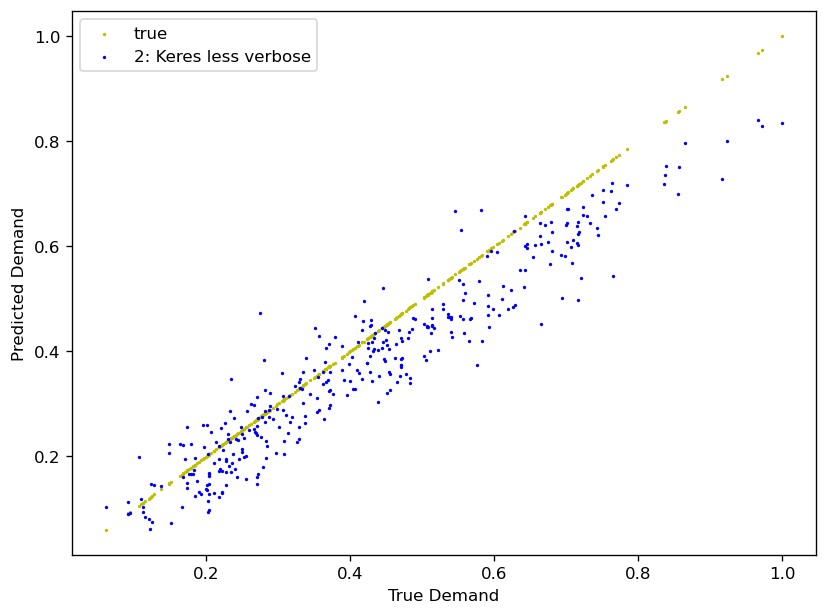

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,1: Keras 200/100/50/25/1 relu example,0.170356,-0.094040,0.606588,0.165858,0.042425,0.431973,0.138826
1,2: Keres less verbose,0.908145,0.854824,0.222935,0.061228,0.005630,0.160302,0.053922


In [18]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(3)

## Better
But not good.  Continue to try different things below:

In [19]:
model_desc = '3: Keres wider middle'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/100
118/118 [==============================] - 1s 2ms/step - loss: 0.0785
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0429
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0298
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0213
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 9/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 10/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 11/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 12/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 13/100


118/118 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 100/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0018


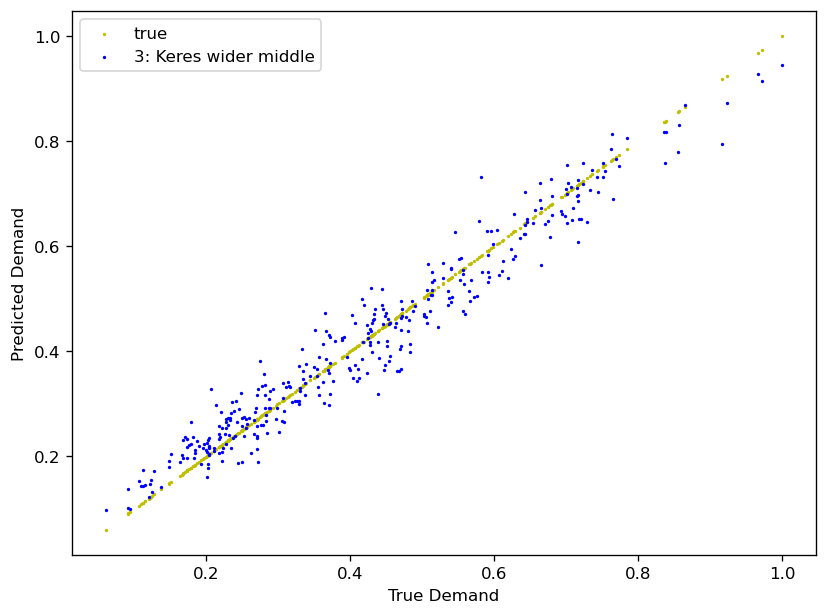

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,1: Keras 200/100/50/25/1 relu example,0.170356,-0.094040,0.606588,0.165858,0.042425,0.431973,0.138826
1,2: Keres less verbose,0.908145,0.854824,0.222935,0.061228,0.005630,0.160302,0.053922
2,3: Keres wider middle,0.950906,0.950897,0.150258,0.034778,0.001904,0.103598,0.030036


In [20]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

### That is about as good as the scikit-learn models on the same data
only much, much slower :)

In [21]:
model_desc = '4: Keres widerer middle'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0861
Epoch 2/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0526
Epoch 3/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0359
Epoch 4/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0278
Epoch 5/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0236
Epoch 6/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0210
Epoch 7/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0191
Epoch 8/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0174
Epoch 9/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0159
Epoch 10/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0147
Epoch 11/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0136
Epoch 12/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0126
Epoch 13/100


118/118 [==============================] - 1s 5ms/step - loss: 0.0021
Epoch 100/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0021


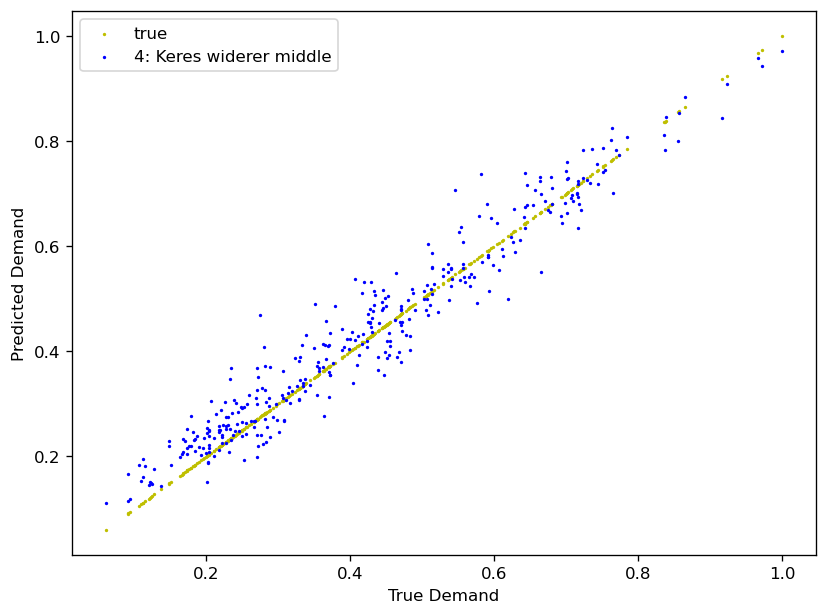

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,1: Keras 200/100/50/25/1 relu example,0.170356,-0.094040,0.606588,0.165858,0.042425,0.431973,0.138826
1,2: Keres less verbose,0.908145,0.854824,0.222935,0.061228,0.005630,0.160302,0.053922
2,3: Keres wider middle,0.950906,0.950897,0.150258,0.034778,0.001904,0.103598,0.030036
3,4: Keres widerer middle,0.943933,0.937851,0.194928,0.038529,0.002410,0.123814,0.031697


In [22]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [23]:
model_desc = '5: Keres wider middle 200 epochs'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0956
Epoch 2/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 3/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0343
Epoch 4/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 5/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0245
Epoch 6/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 7/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 8/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 9/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 10/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 11/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 12/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 13/200


118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 100/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 101/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 102/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 103/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 104/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 105/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 106/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 107/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 108/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 109/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 110/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 

118/118 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 197/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 198/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 199/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 200/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0016


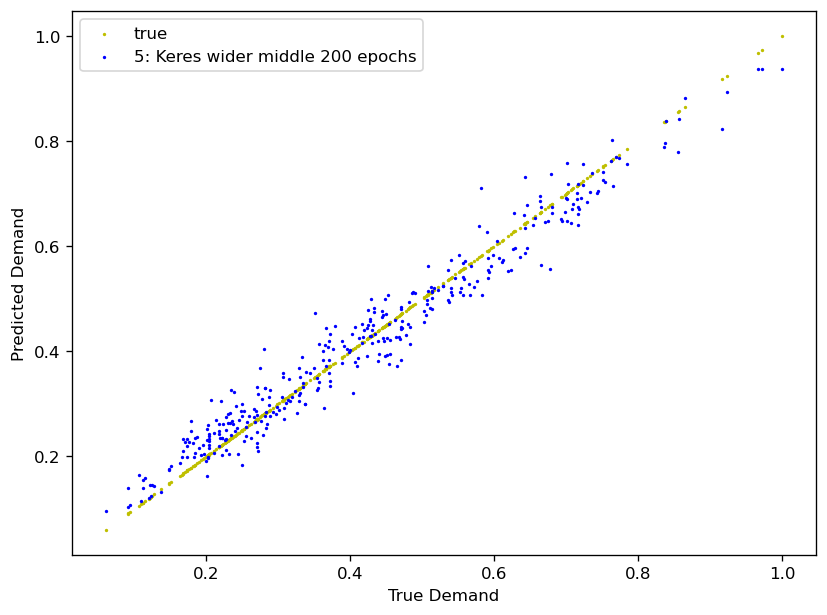

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,1: Keras 200/100/50/25/1 relu example,0.170356,-0.094040,0.606588,0.165858,0.042425,0.431973,0.138826
1,2: Keres less verbose,0.908145,0.854824,0.222935,0.061228,0.005630,0.160302,0.053922
2,3: Keres wider middle,0.950906,0.950897,0.150258,0.034778,0.001904,0.103598,0.030036
3,4: Keres widerer middle,0.943933,0.937851,0.194928,0.038529,0.002410,0.123814,0.031697
4,5: Keres wider middle 200 epochs,0.959526,0.959481,0.128510,0.031931,0.001571,0.097081,0.028559


In [24]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [25]:
model_desc = '6: Keres 200-2000-20'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 1s 3ms/step - loss: 0.1082
Epoch 2/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0638
Epoch 3/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0470
Epoch 4/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0389
Epoch 5/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 6/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0316
Epoch 7/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 8/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0276
Epoch 9/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0260
Epoch 10/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0245
Epoch 11/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 12/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 13/200


118/118 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 100/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 101/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 102/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 103/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 104/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 105/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 106/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 107/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 108/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 109/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 110/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 

118/118 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 197/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 198/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 199/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 200/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0019


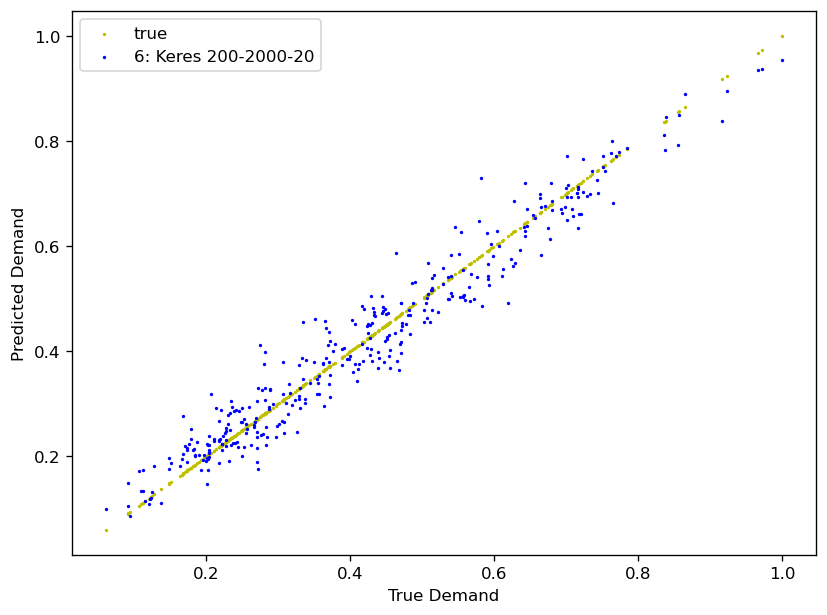

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,1: Keras 200/100/50/25/1 relu example,0.170356,-0.094040,0.606588,0.165858,0.042425,0.431973,0.138826
1,2: Keres less verbose,0.908145,0.854824,0.222935,0.061228,0.005630,0.160302,0.053922
2,3: Keres wider middle,0.950906,0.950897,0.150258,0.034778,0.001904,0.103598,0.030036
3,4: Keres widerer middle,0.943933,0.937851,0.194928,0.038529,0.002410,0.123814,0.031697
4,5: Keres wider middle 200 epochs,0.959526,0.959481,0.128510,0.031931,0.001571,0.097081,0.028559
5,6: Keres 200-2000-20,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226


In [26]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [27]:
# try RMSprop 

from tensorflow.keras.optimizers import RMSprop

model_desc = '7: Keres 482-2000-200-20 RMSprop'

# Model from example
model = Sequential()
model.add(Dense(482, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

# model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

# y_pred = model.predict(X_test)

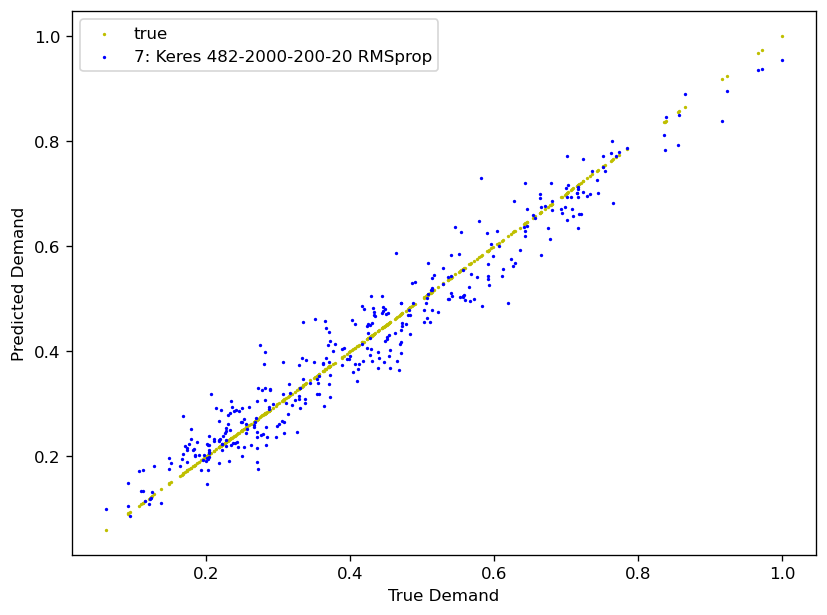

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,1: Keras 200/100/50/25/1 relu example,0.170356,-0.094040,0.606588,0.165858,0.042425,0.431973,0.138826
1,2: Keres less verbose,0.908145,0.854824,0.222935,0.061228,0.005630,0.160302,0.053922
2,3: Keres wider middle,0.950906,0.950897,0.150258,0.034778,0.001904,0.103598,0.030036
3,4: Keres widerer middle,0.943933,0.937851,0.194928,0.038529,0.002410,0.123814,0.031697
4,5: Keres wider middle 200 epochs,0.959526,0.959481,0.128510,0.031931,0.001571,0.097081,0.028559
5,6: Keres 200-2000-20,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
6,7: Keres 482-2000-200-20 RMSprop,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226


In [28]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [29]:
from tensorflow.keras.layers import LeakyReLU

model_desc = '8: Keres 200-2000-20 leaky'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(20))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 675us/step - loss: 0.2446
Epoch 2/200
118/118 [==============================] - 0s 633us/step - loss: 0.2082
Epoch 3/200
118/118 [==============================] - 0s 723us/step - loss: 0.1778
Epoch 4/200
118/118 [==============================] - 0s 668us/step - loss: 0.1525
Epoch 5/200
118/118 [==============================] - 0s 724us/step - loss: 0.1303
Epoch 6/200
118/118 [==============================] - 0s 590us/step - loss: 0.1116
Epoch 7/200
118/118 [==============================] - 0s 786us/step - loss: 0.0954
Epoch 8/200
118/118 [==============================] - 0s 641us/step - loss: 0.0821
Epoch 9/200
118/118 [==============================] - 0s 668us/step - loss: 0.0713
Epoch 10/200
118/118 [==============================] - 0s 590us/step - loss: 0.0628
Epoch 11/200
118/118 [==============================] - 0s 724us/step - loss: 0.0562
Epoch 12/200
118/118 [==============================] - 0s 724us/step - lo

118/118 [==============================] - 0s 724us/step - loss: 0.0052
Epoch 98/200
118/118 [==============================] - 0s 724us/step - loss: 0.0052
Epoch 99/200
118/118 [==============================] - 0s 590us/step - loss: 0.0051
Epoch 100/200
118/118 [==============================] - 0s 668us/step - loss: 0.0050
Epoch 101/200
118/118 [==============================] - 0s 736us/step - loss: 0.0050
Epoch 102/200
118/118 [==============================] - 0s 569us/step - loss: 0.0049
Epoch 103/200
118/118 [==============================] - 0s 723us/step - loss: 0.0049
Epoch 104/200
118/118 [==============================] - 0s 668us/step - loss: 0.0048
Epoch 105/200
118/118 [==============================] - 0s 590us/step - loss: 0.0048
Epoch 106/200
118/118 [==============================] - 0s 724us/step - loss: 0.0047
Epoch 107/200
118/118 [==============================] - 0s 590us/step - loss: 0.0047
Epoch 108/200
118/118 [==============================] - 0s 578us/step

118/118 [==============================] - 0s 650us/step - loss: 0.0032
Epoch 193/200
118/118 [==============================] - 0s 590us/step - loss: 0.0032
Epoch 194/200
118/118 [==============================] - 0s 668us/step - loss: 0.0031
Epoch 195/200
118/118 [==============================] - 0s 724us/step - loss: 0.0031
Epoch 196/200
118/118 [==============================] - 0s 590us/step - loss: 0.0031
Epoch 197/200
118/118 [==============================] - 0s 590us/step - loss: 0.0031
Epoch 198/200
118/118 [==============================] - 0s 609us/step - loss: 0.0031
Epoch 199/200
118/118 [==============================] - 0s 646us/step - loss: 0.0031
Epoch 200/200
118/118 [==============================] - 0s 590us/step - loss: 0.0031


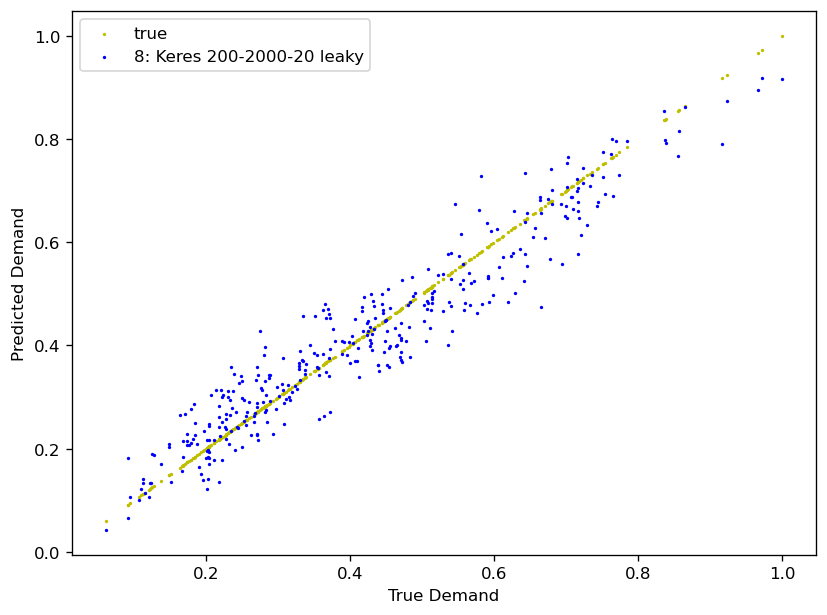

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,1: Keras 200/100/50/25/1 relu example,0.170356,-0.094040,0.606588,0.165858,0.042425,0.431973,0.138826
1,2: Keres less verbose,0.908145,0.854824,0.222935,0.061228,0.005630,0.160302,0.053922
2,3: Keres wider middle,0.950906,0.950897,0.150258,0.034778,0.001904,0.103598,0.030036
3,4: Keres widerer middle,0.943933,0.937851,0.194928,0.038529,0.002410,0.123814,0.031697
4,5: Keres wider middle 200 epochs,0.959526,0.959481,0.128510,0.031931,0.001571,0.097081,0.028559
5,6: Keres 200-2000-20,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
6,7: Keres 482-2000-200-20 RMSprop,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
7,8: Keres 200-2000-20 leaky,0.916296,0.916058,0.191427,0.045191,0.003255,0.130934,0.038893


In [30]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [31]:
# best so far!
from tensorflow.keras.optimizers import RMSprop

model_desc = '9: Keres 200-2000-20 leaky RMSprop'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(20))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 590us/step - loss: 0.0174
Epoch 2/200
118/118 [==============================] - 0s 668us/step - loss: 0.0094
Epoch 3/200
118/118 [==============================] - 0s 652us/step - loss: 0.0075
Epoch 4/200
118/118 [==============================] - 0s 532us/step - loss: 0.0060
Epoch 5/200
118/118 [==============================] - 0s 573us/step - loss: 0.0050
Epoch 6/200
118/118 [==============================] - 0s 723us/step - loss: 0.0042
Epoch 7/200
118/118 [==============================] - 0s 668us/step - loss: 0.0043
Epoch 8/200
118/118 [==============================] - 0s 724us/step - loss: 0.0037
Epoch 9/200
118/118 [==============================] - 0s 724us/step - loss: 0.0034
Epoch 10/200
118/118 [==============================] - 0s 737us/step - loss: 0.0033
Epoch 11/200
118/118 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 12/200
118/118 [==============================] - 0s 1ms/step - loss: 

118/118 [==============================] - 0s 723us/step - loss: 0.0012
Epoch 98/200
118/118 [==============================] - 0s 668us/step - loss: 0.0011
Epoch 99/200
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 100/200
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 101/200
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 102/200
118/118 [==============================] - 0s 601us/step - loss: 0.0012
Epoch 103/200
118/118 [==============================] - 0s 646us/step - loss: 0.0012
Epoch 104/200
118/118 [==============================] - 0s 723us/step - loss: 0.0011
Epoch 105/200
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 106/200
118/118 [==============================] - 0s 723us/step - loss: 0.0011
Epoch 107/200
118/118 [==============================] - 0s 668us/step - loss: 0.0011
Epoch 108/200
118/118 [==============================] - 0s 704us/step

118/118 [==============================] - 0s 668us/step - loss: 9.5786e-04
Epoch 192/200
118/118 [==============================] - 0s 724us/step - loss: 9.9111e-04
Epoch 193/200
118/118 [==============================] - 0s 590us/step - loss: 9.7702e-04
Epoch 194/200
118/118 [==============================] - 0s 724us/step - loss: 9.2772e-04
Epoch 195/200
118/118 [==============================] - 0s 668us/step - loss: 9.9845e-04
Epoch 196/200
118/118 [==============================] - 0s 547us/step - loss: 9.6149e-04
Epoch 197/200
118/118 [==============================] - 0s 711us/step - loss: 9.8174e-04
Epoch 198/200
118/118 [==============================] - 0s 723us/step - loss: 9.3919e-04
Epoch 199/200
118/118 [==============================] - 0s 590us/step - loss: 9.9605e-04
Epoch 200/200
118/118 [==============================] - 0s 668us/step - loss: 9.8466e-04


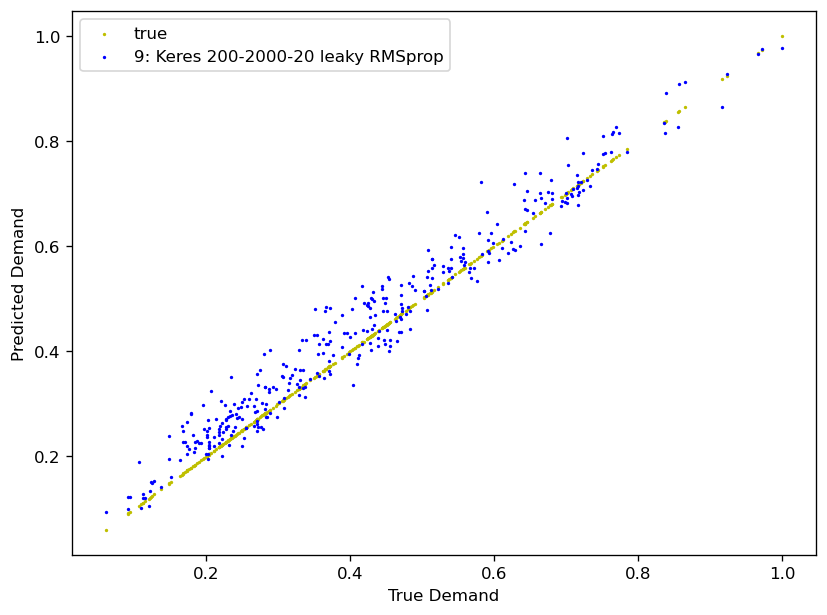

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,1: Keras 200/100/50/25/1 relu example,0.170356,-0.094040,0.606588,0.165858,0.042425,0.431973,0.138826
1,2: Keres less verbose,0.908145,0.854824,0.222935,0.061228,0.005630,0.160302,0.053922
2,3: Keres wider middle,0.950906,0.950897,0.150258,0.034778,0.001904,0.103598,0.030036
3,4: Keres widerer middle,0.943933,0.937851,0.194928,0.038529,0.002410,0.123814,0.031697
4,5: Keres wider middle 200 epochs,0.959526,0.959481,0.128510,0.031931,0.001571,0.097081,0.028559
5,6: Keres 200-2000-20,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
6,7: Keres 482-2000-200-20 RMSprop,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
7,8: Keres 200-2000-20 leaky,0.916296,0.916058,0.191427,0.045191,0.003255,0.130934,0.038893
8,9: Keres 200-2000-20 leaky RMSprop,0.963958,0.947330,0.140937,0.035473,0.002042,0.112854,0.029151


In [32]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [33]:
model_desc = '10: Keres 482-2000L-200L RMSprop'
from tensorflow.keras.optimizers import RMSprop

# Model from example
model = Sequential()
model.add(Dense(482, input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(200))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 590us/step - loss: 0.0363
Epoch 2/200
118/118 [==============================] - 0s 822us/step - loss: 0.0166
Epoch 3/200
118/118 [==============================] - 0s 624us/step - loss: 0.0112
Epoch 4/200
118/118 [==============================] - 0s 724us/step - loss: 0.0080
Epoch 5/200
118/118 [==============================] - 0s 723us/step - loss: 0.0062
Epoch 6/200
118/118 [==============================] - 0s 857us/step - loss: 0.0048
Epoch 7/200
118/118 [==============================] - 0s 668us/step - loss: 0.0044
Epoch 8/200
118/118 [==============================] - 0s 822us/step - loss: 0.0035
Epoch 9/200
118/118 [==============================] - 0s 758us/step - loss: 0.0034
Epoch 10/200
118/118 [==============================] - 0s 724us/step - loss: 0.0030
Epoch 11/200
118/118 [==============================] - 0s 724us/step - loss: 0.0027
Epoch 12/200
118/118 [==============================] - 0s 857us/step - lo

118/118 [==============================] - 0s 822us/step - loss: 0.0012
Epoch 98/200
118/118 [==============================] - 0s 668us/step - loss: 0.0013
Epoch 99/200
118/118 [==============================] - 0s 723us/step - loss: 0.0012
Epoch 100/200
118/118 [==============================] - 0s 724us/step - loss: 0.0012
Epoch 101/200
118/118 [==============================] - 0s 724us/step - loss: 0.0011
Epoch 102/200
118/118 [==============================] - 0s 723us/step - loss: 0.0012
Epoch 103/200
118/118 [==============================] - 0s 689us/step - loss: 0.0012
Epoch 104/200
118/118 [==============================] - 0s 762us/step - loss: 0.0012
Epoch 105/200
118/118 [==============================] - 0s 801us/step - loss: 0.0012
Epoch 106/200
118/118 [==============================] - 0s 724us/step - loss: 0.0012
Epoch 107/200
118/118 [==============================] - 0s 724us/step - loss: 0.0012
Epoch 108/200
118/118 [==============================] - 0s 724us/step

118/118 [==============================] - 0s 724us/step - loss: 9.9114e-04
Epoch 193/200
118/118 [==============================] - 0s 724us/step - loss: 0.0010
Epoch 194/200
118/118 [==============================] - 0s 833us/step - loss: 9.9301e-04
Epoch 195/200
118/118 [==============================] - 0s 727us/step - loss: 9.5020e-04
Epoch 196/200
118/118 [==============================] - 0s 668us/step - loss: 9.9225e-04
Epoch 197/200
118/118 [==============================] - 0s 724us/step - loss: 0.0010
Epoch 198/200
118/118 [==============================] - 0s 724us/step - loss: 9.9737e-04
Epoch 199/200
118/118 [==============================] - 0s 724us/step - loss: 9.9875e-04
Epoch 200/200
118/118 [==============================] - 0s 828us/step - loss: 0.0010


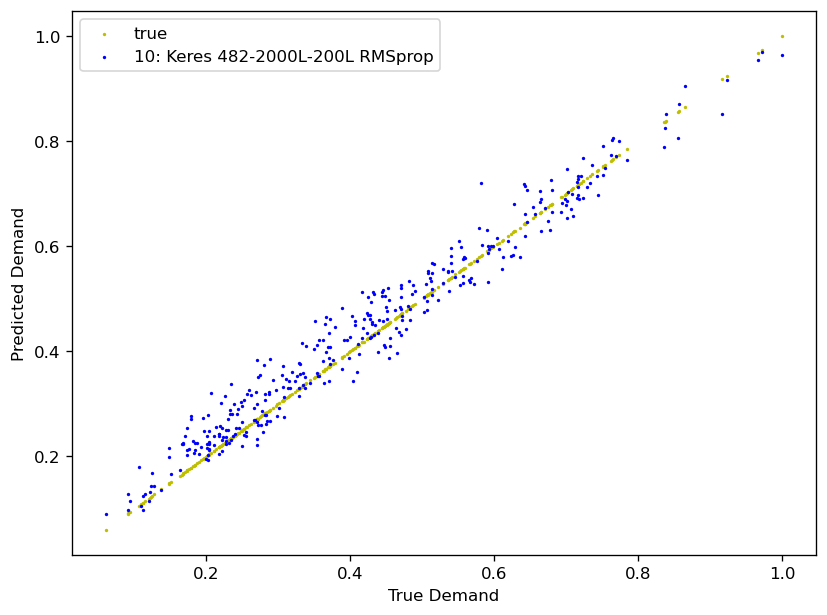

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,1: Keras 200/100/50/25/1 relu example,0.170356,-0.094040,0.606588,0.165858,0.042425,0.431973,0.138826
1,2: Keres less verbose,0.908145,0.854824,0.222935,0.061228,0.005630,0.160302,0.053922
2,3: Keres wider middle,0.950906,0.950897,0.150258,0.034778,0.001904,0.103598,0.030036
3,4: Keres widerer middle,0.943933,0.937851,0.194928,0.038529,0.002410,0.123814,0.031697
4,5: Keres wider middle 200 epochs,0.959526,0.959481,0.128510,0.031931,0.001571,0.097081,0.028559
5,6: Keres 200-2000-20,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
6,7: Keres 482-2000-200-20 RMSprop,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
7,8: Keres 200-2000-20 leaky,0.916296,0.916058,0.191427,0.045191,0.003255,0.130934,0.038893
8,9: Keres 200-2000-20 leaky RMSprop,0.963958,0.947330,0.140937,0.035473,0.002042,0.112854,0.029151
9,10: Keres 482-2000L-200L RMSprop,0.965025,0.957097,0.138692,0.032354,0.001664,0.101740,0.027311


In [34]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [35]:

model_desc = '11: Keres 482-2000L-200L RMSprop 300epoc'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(200))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())


model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/300
118/118 [==============================] - 0s 534us/step - loss: 0.0257
Epoch 2/300
118/118 [==============================] - 0s 590us/step - loss: 0.0084
Epoch 3/300
118/118 [==============================] - 0s 590us/step - loss: 0.0068
Epoch 4/300
118/118 [==============================] - 0s 723us/step - loss: 0.0062
Epoch 5/300
118/118 [==============================] - 0s 534us/step - loss: 0.0057
Epoch 6/300
118/118 [==============================] - 0s 590us/step - loss: 0.0053
Epoch 7/300
118/118 [==============================] - 0s 662us/step - loss: 0.0052
Epoch 8/300
118/118 [==============================] - 0s 634us/step - loss: 0.0042
Epoch 9/300
118/118 [==============================] - 0s 668us/step - loss: 0.0042
Epoch 10/300
118/118 [==============================] - 0s 724us/step - loss: 0.0040
Epoch 11/300
118/118 [==============================] - 0s 723us/step - loss: 0.0037
Epoch 12/300
118/118 [==============================] - 0s 590us/step - lo

118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 98/300
118/118 [==============================] - 0s 668us/step - loss: 0.0012
Epoch 99/300
118/118 [==============================] - 0s 617us/step - loss: 0.0012
Epoch 100/300
118/118 [==============================] - 0s 490us/step - loss: 0.0013
Epoch 101/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 102/300
118/118 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 103/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 104/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 105/300
118/118 [==============================] - 0s 668us/step - loss: 0.0012
Epoch 106/300
118/118 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 107/300
118/118 [==============================] - 0s 620us/step - loss: 0.0012
Epoch 108/300
118/118 [==============================] - 0s 694us/step

118/118 [==============================] - 0s 590us/step - loss: 0.0010
Epoch 193/300
118/118 [==============================] - 0s 590us/step - loss: 9.9079e-04
Epoch 194/300
118/118 [==============================] - 0s 668us/step - loss: 9.9751e-04
Epoch 195/300
118/118 [==============================] - 0s 629us/step - loss: 0.0010
Epoch 196/300
118/118 [==============================] - 0s 533us/step - loss: 0.0010
Epoch 197/300
118/118 [==============================] - 0s 534us/step - loss: 9.7185e-04
Epoch 198/300
118/118 [==============================] - 0s 590us/step - loss: 0.0010
Epoch 199/300
118/118 [==============================] - 0s 590us/step - loss: 0.0010
Epoch 200/300
118/118 [==============================] - 0s 590us/step - loss: 9.9534e-04
Epoch 201/300
118/118 [==============================] - 0s 534us/step - loss: 0.0010
Epoch 202/300
118/118 [==============================] - 0s 590us/step - loss: 0.0010
Epoch 203/300
118/118 [=============================

118/118 [==============================] - 0s 590us/step - loss: 9.4080e-04
Epoch 284/300
118/118 [==============================] - 0s 590us/step - loss: 9.1846e-04
Epoch 285/300
118/118 [==============================] - 0s 668us/step - loss: 9.0393e-04
Epoch 286/300
118/118 [==============================] - 0s 534us/step - loss: 8.8459e-04
Epoch 287/300
118/118 [==============================] - 0s 655us/step - loss: 9.2355e-04
Epoch 288/300
118/118 [==============================] - 0s 520us/step - loss: 9.3881e-04
Epoch 289/300
118/118 [==============================] - 0s 857us/step - loss: 8.9447e-04
Epoch 290/300
118/118 [==============================] - 0s 802us/step - loss: 9.1239e-04
Epoch 291/300
118/118 [==============================] - 0s 668us/step - loss: 8.9272e-04
Epoch 292/300
118/118 [==============================] - 0s 857us/step - loss: 8.8203e-04
Epoch 293/300
118/118 [==============================] - 0s 760us/step - loss: 8.9346e-04
Epoch 294/300
118/118 [=

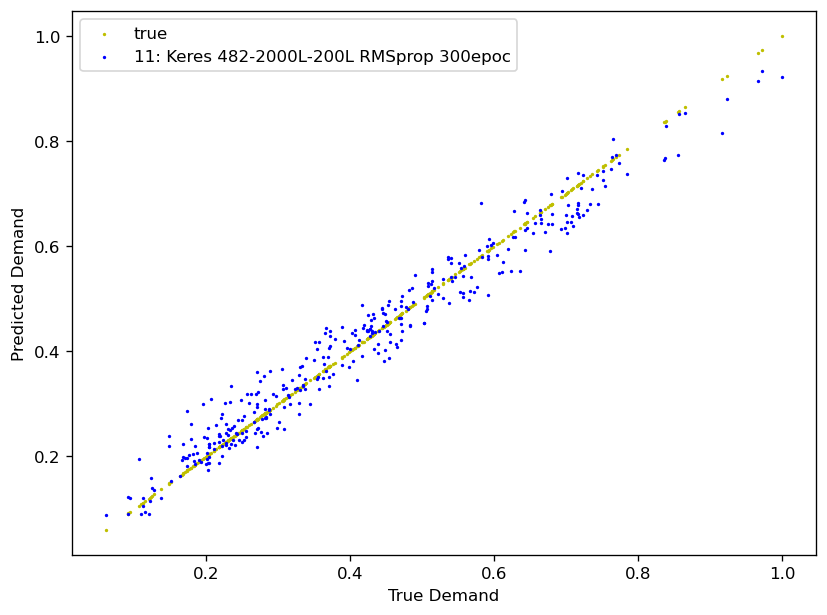

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
1,2: Keres less verbose,0.908145,0.854824,0.222935,0.061228,0.005630,0.160302,0.053922
2,3: Keres wider middle,0.950906,0.950897,0.150258,0.034778,0.001904,0.103598,0.030036
3,4: Keres widerer middle,0.943933,0.937851,0.194928,0.038529,0.002410,0.123814,0.031697
4,5: Keres wider middle 200 epochs,0.959526,0.959481,0.128510,0.031931,0.001571,0.097081,0.028559
5,6: Keres 200-2000-20,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
6,7: Keres 482-2000-200-20 RMSprop,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
7,8: Keres 200-2000-20 leaky,0.916296,0.916058,0.191427,0.045191,0.003255,0.130934,0.038893
8,9: Keres 200-2000-20 leaky RMSprop,0.963958,0.947330,0.140937,0.035473,0.002042,0.112854,0.029151
9,10: Keres 482-2000L-200L RMSprop,0.965025,0.957097,0.138692,0.032354,0.001664,0.101740,0.027311
10,11: Keres 482-2000L-200L RMSprop 300epoc,0.962575,0.962538,0.112829,0.030031,0.001453,0.089269,0.024771


In [36]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [37]:

model_desc = '12: Keres 482-2000L-400L-100R RMSprop 300'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(400))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())

model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/300
118/118 [==============================] - 0s 590us/step - loss: 0.0093
Epoch 2/300
118/118 [==============================] - 0s 590us/step - loss: 0.0041
Epoch 3/300
118/118 [==============================] - 0s 590us/step - loss: 0.0033
Epoch 4/300
118/118 [==============================] - 0s 534us/step - loss: 0.0028
Epoch 5/300
118/118 [==============================] - 0s 611us/step - loss: 0.0026
Epoch 6/300
118/118 [==============================] - 0s 702us/step - loss: 0.0022
Epoch 7/300
118/118 [==============================] - 0s 724us/step - loss: 0.0022
Epoch 8/300
118/118 [==============================] - 0s 724us/step - loss: 0.0020
Epoch 9/300
118/118 [==============================] - 0s 723us/step - loss: 0.0021
Epoch 10/300
118/118 [==============================] - 0s 668us/step - loss: 0.0019
Epoch 11/300
118/118 [==============================] - 0s 824us/step - loss: 0.0019
Epoch 12/300
118/118 [==============================] - 0s 606us/step - lo

118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 98/300
118/118 [==============================] - 0s 668us/step - loss: 0.0010
Epoch 99/300
118/118 [==============================] - 0s 590us/step - loss: 0.0010
Epoch 100/300
118/118 [==============================] - 0s 769us/step - loss: 0.0011
Epoch 101/300
118/118 [==============================] - 0s 661us/step - loss: 0.0010
Epoch 102/300
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 103/300
118/118 [==============================] - 0s 668us/step - loss: 9.9947e-04
Epoch 104/300
118/118 [==============================] - 0s 724us/step - loss: 0.0010
Epoch 105/300
118/118 [==============================] - 0s 724us/step - loss: 0.0011
Epoch 106/300
118/118 [==============================] - 0s 590us/step - loss: 0.0010
Epoch 107/300
118/118 [==============================] - 0s 784us/step - loss: 0.0011
Epoch 108/300
118/118 [==============================] - 0s 620us/

118/118 [==============================] - 0s 723us/step - loss: 7.1980e-04
Epoch 189/300
118/118 [==============================] - 0s 723us/step - loss: 7.6382e-04
Epoch 190/300
118/118 [==============================] - 0s 668us/step - loss: 7.5620e-04
Epoch 191/300
118/118 [==============================] - 0s 755us/step - loss: 7.2899e-04
Epoch 192/300
118/118 [==============================] - 0s 541us/step - loss: 7.8701e-04
Epoch 193/300
118/118 [==============================] - 0s 590us/step - loss: 7.5533e-04
Epoch 194/300
118/118 [==============================] - 0s 723us/step - loss: 7.3165e-04
Epoch 195/300
118/118 [==============================] - 0s 668us/step - loss: 7.3325e-04
Epoch 196/300
118/118 [==============================] - 0s 724us/step - loss: 7.2690e-04
Epoch 197/300
118/118 [==============================] - 0s 590us/step - loss: 7.6240e-04
Epoch 198/300
118/118 [==============================] - 0s 680us/step - loss: 7.5489e-04
Epoch 199/300
118/118 [=

118/118 [==============================] - 0s 724us/step - loss: 6.2768e-04
Epoch 280/300
118/118 [==============================] - 0s 724us/step - loss: 5.6649e-04
Epoch 281/300
118/118 [==============================] - 0s 590us/step - loss: 6.1927e-04
Epoch 282/300
118/118 [==============================] - 0s 668us/step - loss: 5.9456e-04
Epoch 283/300
118/118 [==============================] - 0s 689us/step - loss: 5.7751e-04
Epoch 284/300
118/118 [==============================] - 0s 606us/step - loss: 5.6452e-04
Epoch 285/300
118/118 [==============================] - 0s 724us/step - loss: 6.1430e-04
Epoch 286/300
118/118 [==============================] - 0s 590us/step - loss: 6.2740e-04
Epoch 287/300
118/118 [==============================] - 0s 668us/step - loss: 6.3199e-04
Epoch 288/300
118/118 [==============================] - 0s 590us/step - loss: 6.2267e-04
Epoch 289/300
118/118 [==============================] - 0s 723us/step - loss: 5.5700e-04
Epoch 290/300
118/118 [=

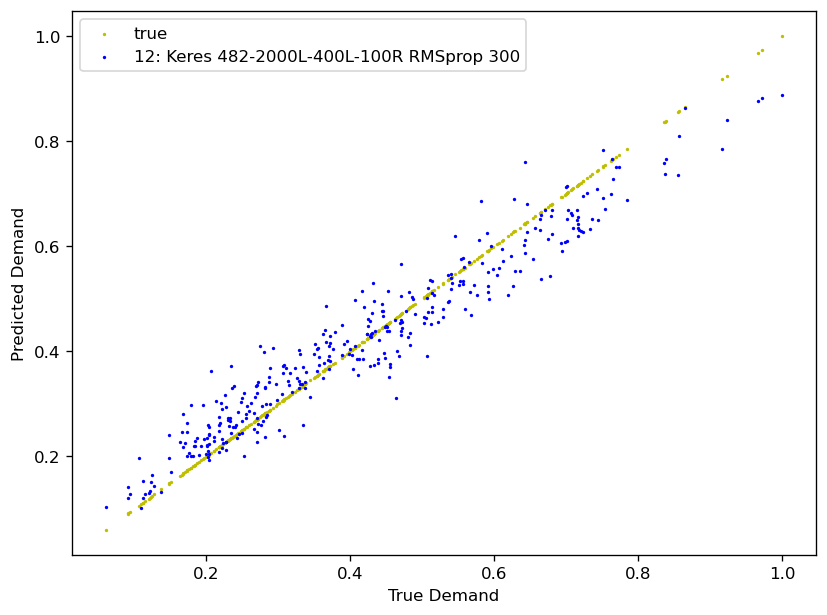

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
2,3: Keres wider middle,0.950906,0.950897,0.150258,0.034778,0.001904,0.103598,0.030036
3,4: Keres widerer middle,0.943933,0.937851,0.194928,0.038529,0.002410,0.123814,0.031697
4,5: Keres wider middle 200 epochs,0.959526,0.959481,0.128510,0.031931,0.001571,0.097081,0.028559
5,6: Keres 200-2000-20,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
6,7: Keres 482-2000-200-20 RMSprop,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
7,8: Keres 200-2000-20 leaky,0.916296,0.916058,0.191427,0.045191,0.003255,0.130934,0.038893
8,9: Keres 200-2000-20 leaky RMSprop,0.963958,0.947330,0.140937,0.035473,0.002042,0.112854,0.029151
9,10: Keres 482-2000L-200L RMSprop,0.965025,0.957097,0.138692,0.032354,0.001664,0.101740,0.027311
10,11: Keres 482-2000L-200L RMSprop 300epoc,0.962575,0.962538,0.112829,0.030031,0.001453,0.089269,0.024771
11,12: Keres 482-2000L-400L-100R RMSprop 300,0.922626,0.922618,0.155795,0.043651,0.003001,0.127527,0.037836


In [38]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [39]:

model_desc = '13: Keres 482-5000L-200L RMSprop 300epoc'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(5000))
model.add(LeakyReLU(200))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())


model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/300
118/118 [==============================] - 0s 456us/step - loss: 0.0276
Epoch 2/300
118/118 [==============================] - 0s 600us/step - loss: 0.0073
Epoch 3/300
118/118 [==============================] - 0s 481us/step - loss: 0.0067
Epoch 4/300
118/118 [==============================] - 0s 620us/step - loss: 0.0055
Epoch 5/300
118/118 [==============================] - 0s 668us/step - loss: 0.0054
Epoch 6/300
118/118 [==============================] - 0s 534us/step - loss: 0.0049
Epoch 7/300
118/118 [==============================] - 0s 724us/step - loss: 0.0051
Epoch 8/300
118/118 [==============================] - 0s 590us/step - loss: 0.0044
Epoch 9/300
118/118 [==============================] - 0s 696us/step - loss: 0.0048
Epoch 10/300
118/118 [==============================] - 0s 517us/step - loss: 0.0042
Epoch 11/300
118/118 [==============================] - 0s 616us/step - loss: 0.0041
Epoch 12/300
118/118 [==============================] - 0s 590us/step - lo

118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 98/300
118/118 [==============================] - 0s 723us/step - loss: 0.0013
Epoch 99/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 100/300
118/118 [==============================] - 0s 534us/step - loss: 0.0013
Epoch 101/300
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 102/300
118/118 [==============================] - 0s 612us/step - loss: 0.0013
Epoch 103/300
118/118 [==============================] - 0s 534us/step - loss: 0.0013
Epoch 104/300
118/118 [==============================] - 0s 573us/step - loss: 0.0013
Epoch 105/300
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 106/300
118/118 [==============================] - 0s 723us/step - loss: 0.0013
Epoch 107/300
118/118 [==============================] - 0s 534us/step - loss: 0.0013
Epoch 108/300
118/118 [==============================] - 0s 590us/step

118/118 [==============================] - 0s 668us/step - loss: 0.0010
Epoch 193/300
118/118 [==============================] - 0s 590us/step - loss: 0.0010
Epoch 194/300
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 195/300
118/118 [==============================] - 0s 668us/step - loss: 0.0010
Epoch 196/300
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 197/300
118/118 [==============================] - 0s 635us/step - loss: 0.0011
Epoch 198/300
118/118 [==============================] - 0s 527us/step - loss: 0.0011
Epoch 199/300
118/118 [==============================] - 0s 668us/step - loss: 0.0010
Epoch 200/300
118/118 [==============================] - 0s 590us/step - loss: 0.0010
Epoch 201/300
118/118 [==============================] - 0s 590us/step - loss: 0.0010
Epoch 202/300
118/118 [==============================] - 0s 534us/step - loss: 0.0010
Epoch 203/300
118/118 [==============================] - 0s 590us/st

118/118 [==============================] - 0s 633us/step - loss: 9.4704e-04
Epoch 286/300
118/118 [==============================] - 0s 529us/step - loss: 9.7468e-04
Epoch 287/300
118/118 [==============================] - 0s 658us/step - loss: 9.2403e-04
Epoch 288/300
118/118 [==============================] - 0s 590us/step - loss: 9.8264e-04
Epoch 289/300
118/118 [==============================] - 0s 534us/step - loss: 9.4749e-04
Epoch 290/300
118/118 [==============================] - 0s 590us/step - loss: 9.7267e-04
Epoch 291/300
118/118 [==============================] - 0s 590us/step - loss: 9.6012e-04
Epoch 292/300
118/118 [==============================] - 0s 590us/step - loss: 9.4295e-04
Epoch 293/300
118/118 [==============================] - 0s 604us/step - loss: 9.5937e-04
Epoch 294/300
118/118 [==============================] - 0s 654us/step - loss: 9.4105e-04
Epoch 295/300
118/118 [==============================] - 0s 590us/step - loss: 9.2414e-04
Epoch 296/300
118/118 [=

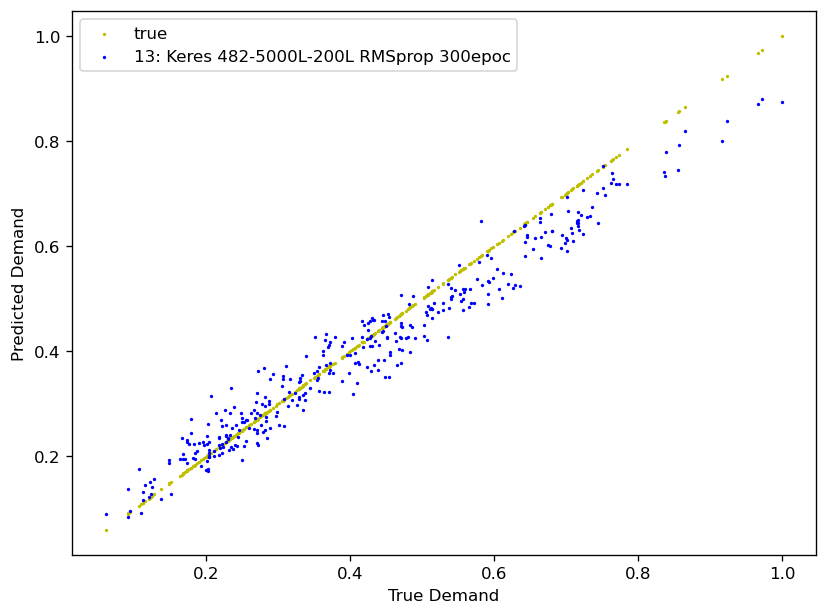

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
3,4: Keres widerer middle,0.943933,0.937851,0.194928,0.038529,0.002410,0.123814,0.031697
4,5: Keres wider middle 200 epochs,0.959526,0.959481,0.128510,0.031931,0.001571,0.097081,0.028559
5,6: Keres 200-2000-20,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
6,7: Keres 482-2000-200-20 RMSprop,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
7,8: Keres 200-2000-20 leaky,0.916296,0.916058,0.191427,0.045191,0.003255,0.130934,0.038893
8,9: Keres 200-2000-20 leaky RMSprop,0.963958,0.947330,0.140937,0.035473,0.002042,0.112854,0.029151
9,10: Keres 482-2000L-200L RMSprop,0.965025,0.957097,0.138692,0.032354,0.001664,0.101740,0.027311
10,11: Keres 482-2000L-200L RMSprop 300epoc,0.962575,0.962538,0.112829,0.030031,0.001453,0.089269,0.024771
11,12: Keres 482-2000L-400L-100R RMSprop 300,0.922626,0.922618,0.155795,0.043651,0.003001,0.127527,0.037836
12,13: Keres 482-5000L-200L RMSprop 300epoc,0.946839,0.939130,0.125938,0.039202,0.002360,0.103324,0.032503


In [40]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [41]:

model_desc = '14: Keres 482-100L-1000L-100L RMSprop 200epoc'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(100))
model.add(LeakyReLU(1000))
model.add(LeakyReLU(100))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())


model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 590us/step - loss: 0.0274
Epoch 2/200
118/118 [==============================] - 0s 590us/step - loss: 0.0088
Epoch 3/200
118/118 [==============================] - 0s 534us/step - loss: 0.0074
Epoch 4/200
118/118 [==============================] - 0s 590us/step - loss: 0.0065
Epoch 5/200
118/118 [==============================] - 0s 590us/step - loss: 0.0053
Epoch 6/200
118/118 [==============================] - 0s 738us/step - loss: 0.0050
Epoch 7/200
118/118 [==============================] - 0s 507us/step - loss: 0.0050
Epoch 8/200
118/118 [==============================] - 0s 581us/step - loss: 0.0047
Epoch 9/200
118/118 [==============================] - 0s 590us/step - loss: 0.0046
Epoch 10/200
118/118 [==============================] - 0s 590us/step - loss: 0.0047
Epoch 11/200
118/118 [==============================] - 0s 668us/step - loss: 0.0041
Epoch 12/200
118/118 [==============================] - 0s 590us/step - lo

118/118 [==============================] - 0s 668us/step - loss: 0.0012
Epoch 98/200
118/118 [==============================] - 0s 529us/step - loss: 0.0012
Epoch 99/200
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 100/200
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 101/200
118/118 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 102/200
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 103/200
118/118 [==============================] - 0s 634us/step - loss: 0.0012
Epoch 104/200
118/118 [==============================] - 0s 538us/step - loss: 0.0012
Epoch 105/200
118/118 [==============================] - 0s 654us/step - loss: 0.0012
Epoch 106/200
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 107/200
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 108/200
118/118 [==============================] - 0s 668us/step

118/118 [==============================] - 0s 590us/step - loss: 0.0010
Epoch 193/200
118/118 [==============================] - 0s 590us/step - loss: 9.9295e-04
Epoch 194/200
118/118 [==============================] - 0s 590us/step - loss: 0.0010
Epoch 195/200
118/118 [==============================] - 0s 690us/step - loss: 0.0010
Epoch 196/200
118/118 [==============================] - 0s 551us/step - loss: 0.0010
Epoch 197/200
118/118 [==============================] - 0s 590us/step - loss: 9.6421e-04
Epoch 198/200
118/118 [==============================] - 0s 668us/step - loss: 9.8991e-04
Epoch 199/200
118/118 [==============================] - 0s 590us/step - loss: 0.0010
Epoch 200/200
118/118 [==============================] - 0s 590us/step - loss: 0.0010


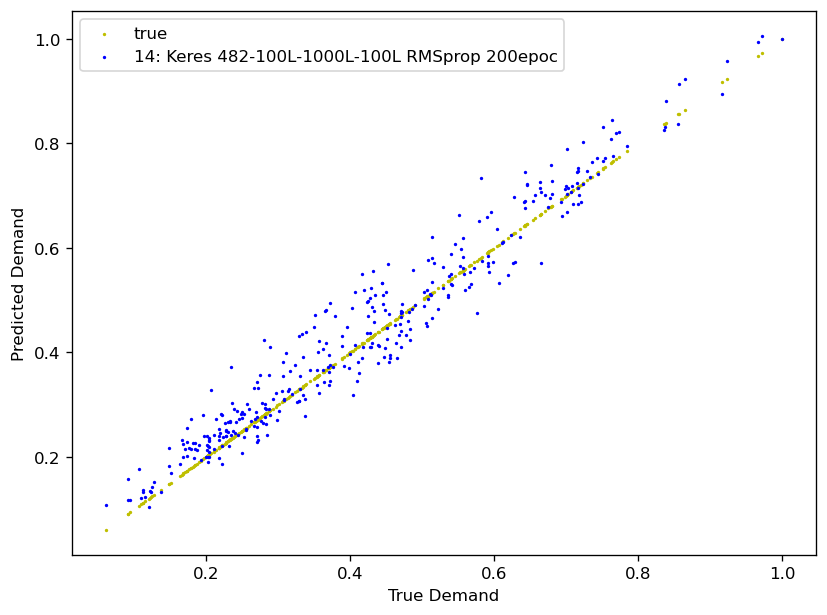

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
4,5: Keres wider middle 200 epochs,0.959526,0.959481,0.128510,0.031931,0.001571,0.097081,0.028559
5,6: Keres 200-2000-20,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
6,7: Keres 482-2000-200-20 RMSprop,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
7,8: Keres 200-2000-20 leaky,0.916296,0.916058,0.191427,0.045191,0.003255,0.130934,0.038893
8,9: Keres 200-2000-20 leaky RMSprop,0.963958,0.947330,0.140937,0.035473,0.002042,0.112854,0.029151
9,10: Keres 482-2000L-200L RMSprop,0.965025,0.957097,0.138692,0.032354,0.001664,0.101740,0.027311
10,11: Keres 482-2000L-200L RMSprop 300epoc,0.962575,0.962538,0.112829,0.030031,0.001453,0.089269,0.024771
11,12: Keres 482-2000L-400L-100R RMSprop 300,0.922626,0.922618,0.155795,0.043651,0.003001,0.127527,0.037836
12,13: Keres 482-5000L-200L RMSprop 300epoc,0.946839,0.939130,0.125938,0.039202,0.002360,0.103324,0.032503
13,14: Keres 482-100L-1000L-100L RMSprop 200epoc,0.949261,0.939834,0.152945,0.037145,0.002333,0.111370,0.028809


In [42]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

## Report best performing configurations by R2/COD

In [43]:
# Best performing models: 
report.sort_values(by='R2/COD', ignore_index=True, ascending=False)

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,11: Keres 482-2000L-200L RMSprop 300epoc,0.962575,0.962538,0.112829,0.030031,0.001453,0.089269,0.024771
1,5: Keres wider middle 200 epochs,0.959526,0.959481,0.128510,0.031931,0.001571,0.097081,0.028559
2,10: Keres 482-2000L-200L RMSprop,0.965025,0.957097,0.138692,0.032354,0.001664,0.101740,0.027311
3,3: Keres wider middle,0.950906,0.950897,0.150258,0.034778,0.001904,0.103598,0.030036
4,6: Keres 200-2000-20,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
5,7: Keres 482-2000-200-20 RMSprop,0.950388,0.950378,0.148273,0.034901,0.001924,0.104116,0.030226
6,9: Keres 200-2000-20 leaky RMSprop,0.963958,0.947330,0.140937,0.035473,0.002042,0.112854,0.029151
7,14: Keres 482-100L-1000L-100L RMSprop 200epoc,0.949261,0.939834,0.152945,0.037145,0.002333,0.111370,0.028809
8,13: Keres 482-5000L-200L RMSprop 300epoc,0.946839,0.939130,0.125938,0.039202,0.002360,0.103324,0.032503
9,4: Keres widerer middle,0.943933,0.937851,0.194928,0.038529,0.002410,0.123814,0.031697



# Project Summary: 

* Even very simple methods such as linear regression, with appropriate feature selection, can still yield good results
* Keras/Tensorflow with guessed layer sizes performed better than scikit-learn methods on same features
    * though much, much slower
* Individual short runs of genetic feature search resulted in 15 features that predict nearly as well as 481 features
* Genetic winnowing (overnight) to 15 features was no better than combining champions from several short runs


## Problems with this work
* I used *actual* measured weather to *forecast* electric demand. To actually use this model to forecast future electric demand, one would need to use use weather *forecast* data, and any forecast errors could compound with the errors in my model. 



## Potential future work


* Each company that makes up the organization could be modeled independently, then those models combined to get total utility demand, instead of modeling total utility demand as a single model
* HDD and CDD are clearly important to the linear methods; is 65F the right pivot temperature? These are more parameters that could be tuned for each location
* Not all holidays are equal; a simple regression could be done to determine the impact of each holiday and define a scaling factor for each instead of an integer
    * Labor day and Thanksgiving are consistently more important than 4th of July
* Hourly instead of daily models would potentially be more useful. Weather data and demand data are available hourly
* Rooftop solar may becoming important; widespread small-scale solar would show up as decreased demand. While daily high temperatures may correlate with solar production, sun hours per day or percent cloudy could be a better predictor variable
* Automatic hyperparamter tuning should be investigated; a Keras hyperparameter tuner is available at https://www.sicara.ai/blog/hyperparameter-tuning-keras-tuner or genetic search methods could he used
* Specialized time-series models such as https://facebook.github.io/prophet/ for seasonal time-series modeling should be investigated